
# 데이터 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patches
import numpy as np


# csv 형식으로 된 데이터 파일을 읽어오기
train = pd.read_csv('data/train.csv')

train

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,1,8.0,0.18,0.37,1.30,0.040,15.0,96.0,0.99120,3.06,0.61,12.1,white,6
1,2,7.5,0.38,0.29,4.90,0.021,38.0,113.0,0.99026,3.08,0.48,13.0,white,7
2,3,6.1,0.27,0.33,2.20,0.021,26.0,117.0,0.98860,3.12,0.30,12.5,white,6
3,4,6.4,0.32,0.50,10.70,0.047,57.0,206.0,0.99680,3.08,0.60,9.4,white,5
4,5,8.4,0.37,0.43,2.30,0.063,12.0,19.0,0.99550,3.17,0.81,11.2,red,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3226,3227,6.4,0.16,0.31,5.30,0.043,42.0,157.0,0.99455,3.35,0.47,10.5,white,5
3227,3228,6.4,0.18,0.28,17.05,0.047,53.0,139.0,0.99724,3.25,0.35,10.5,white,6
3228,3229,6.0,0.28,0.25,1.80,0.042,8.0,108.0,0.99290,3.08,0.55,9.0,white,5
3229,3230,7.7,0.28,0.29,6.90,0.041,29.0,163.0,0.99520,3.44,0.60,10.5,white,6


In [2]:
train.columns

Index(['id', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'type',
       'quality'],
      dtype='object')

## 결측치 확인하기

In [3]:
def check_missing_col(dataframe):
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'총 {missing_values}개의 결측치가 존재합니다.')

        if i == len(dataframe.columns) - 1 and counted_missing_col == 0:
            print('결측치가 존재하지 않습니다')

check_missing_col(train)

결측치가 존재하지 않습니다


## 데이터 살펴보기

클래스 분포 확인

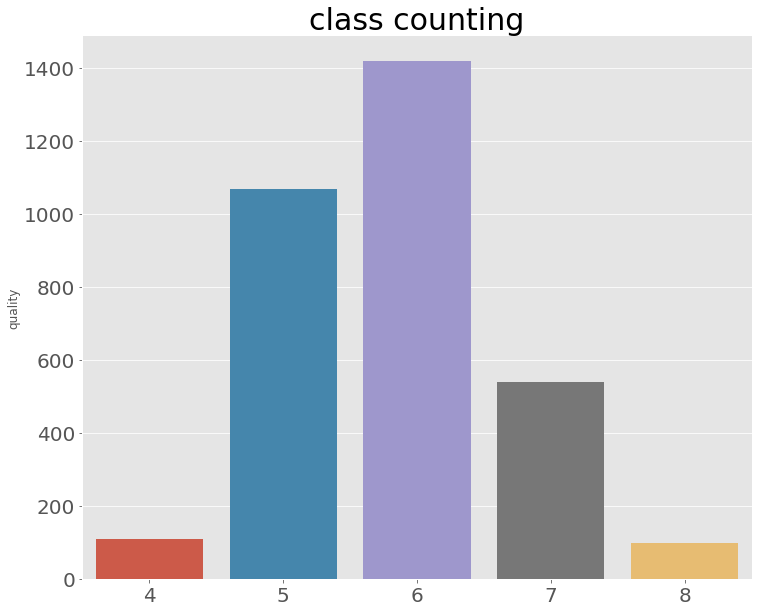

In [12]:
counted_values = train['quality'].value_counts()
plt.style.use('ggplot')
plt.figure(figsize=(12, 10))
plt.title('class counting', fontsize = 30)
value_bar_ax = sns.barplot(x=counted_values.index, y=counted_values)
value_bar_ax.tick_params(labelsize=20)

#대부분 5, 6에 분포
#4, 8 데이터량 매우 매우 부족 -> 데이터 증강 필요

전체적인 데이터 살펴보기

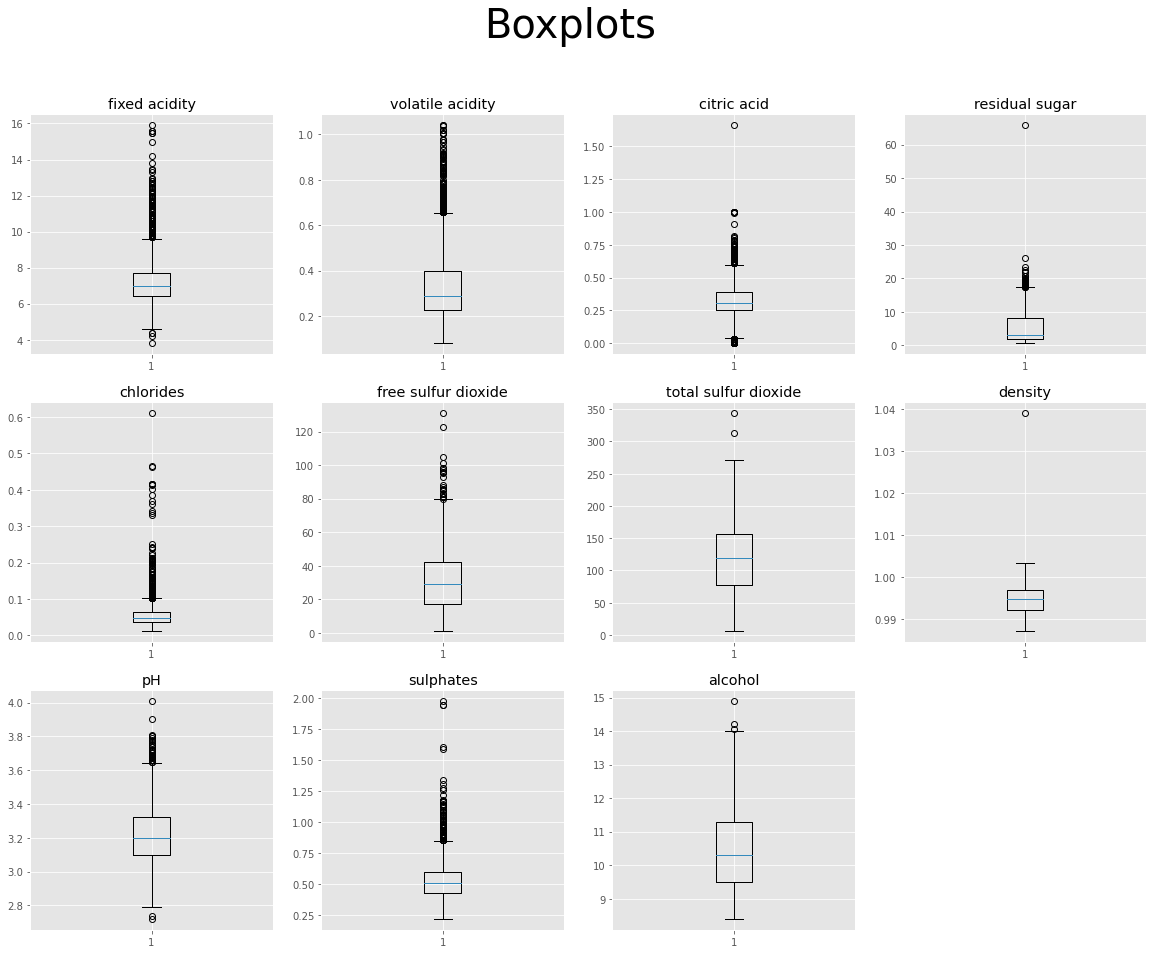

In [5]:
lt.style.use("ggplot")

plt.figure(figsize=(20,15))
plt.suptitle("Boxplots", fontsize=40)

# id, type, quality는 제외하고 시각화
cols = train.columns[1:-2]
for i in range(len(cols)):
    plt.subplot(3,4,i+1)
    plt.title(cols[i])
    plt.boxplot(train[cols[i]])
plt.show()

#대부분의 col이 outlier을 가지고 있다 -> 정규분포가 아니다 
#scale이 모두 다름 -> 정규화 필수 

와인품질마다 고유 특성이 있을까?

In [25]:
qualities = {}

for i in range(4, 9):
    quality_description = train[train['quality'] == i].drop(['id', 'quality'], axis = 1).describe()
    if i == 4: 
        means = pd.DataFrame({i: quality_description.loc['mean']})
    else:
        mean = pd.DataFrame({i: quality_description.loc['mean']})
        means = pd.concat([means, mean], axis=1)
        
means = means.T

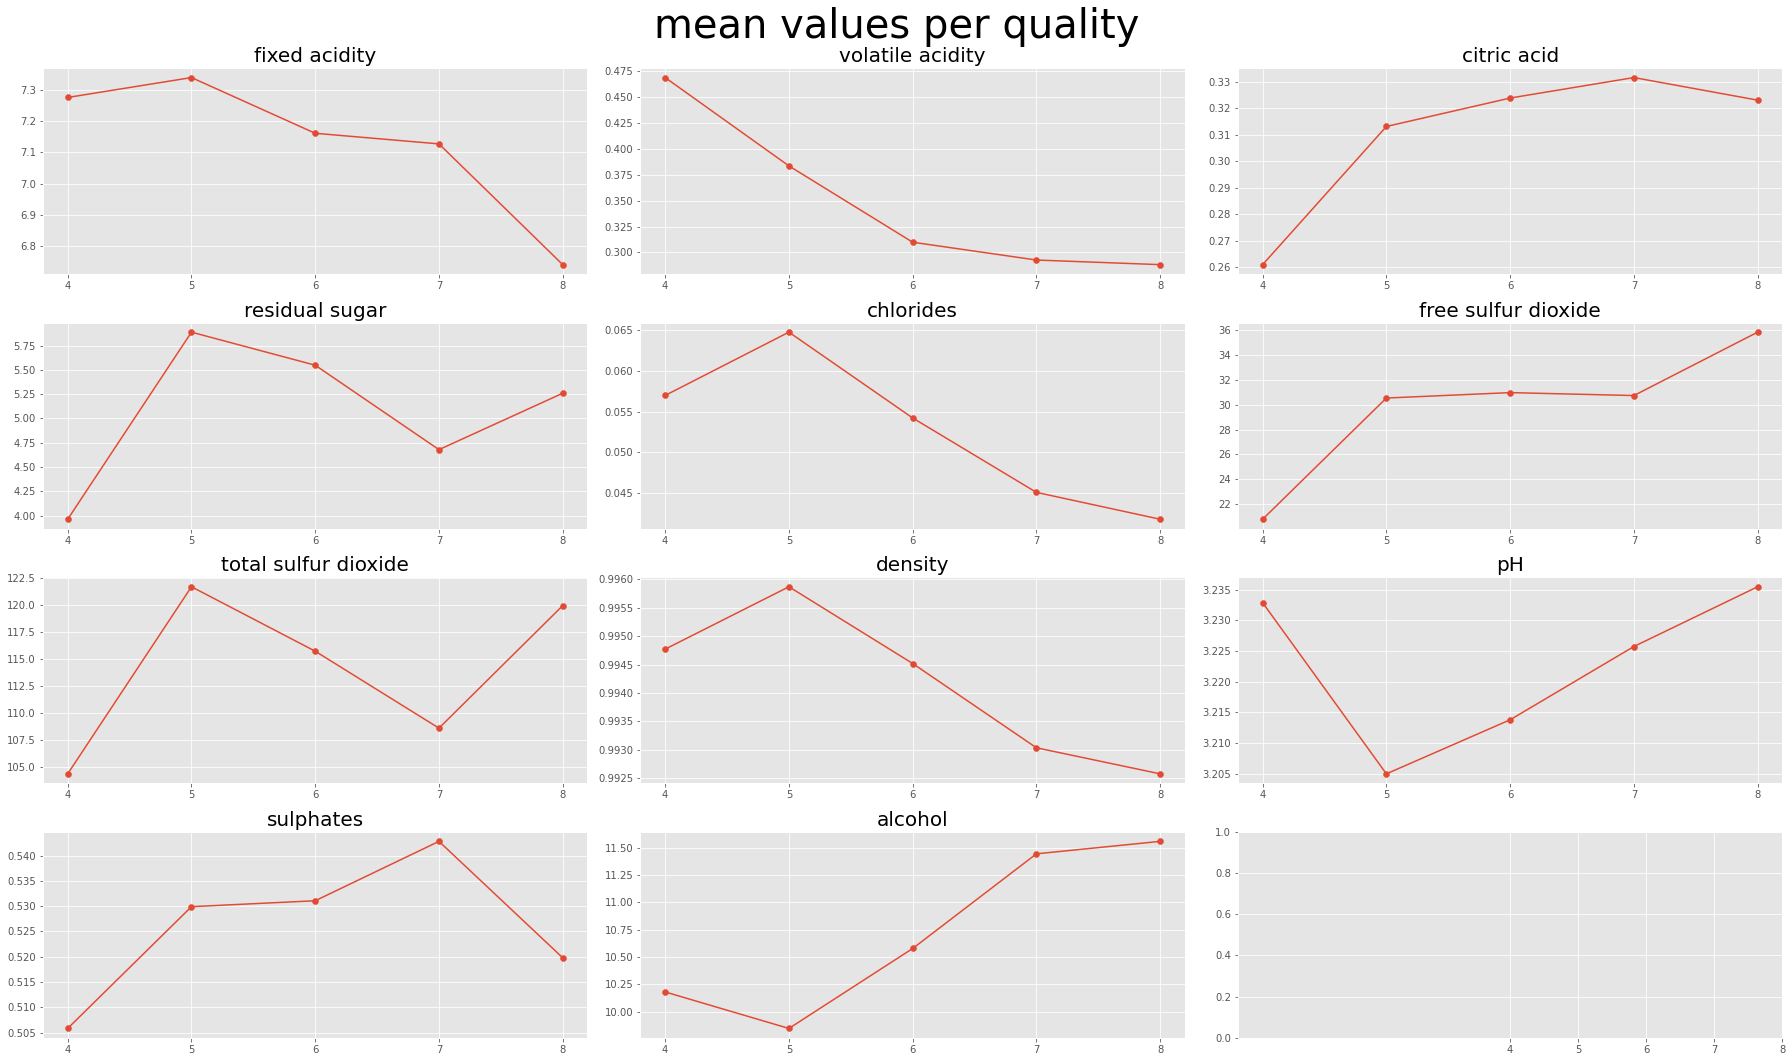

In [26]:
fig, axes = plt.subplots(4, 3, figsize=(25, 15))

fig.suptitle('mean values per quality', fontsize = 40)
for ax, col in zip(axes.flat, means.columns):
    ax.plot([4,5,6,7,8], means[col])
    ax.scatter([4,5,6,7,8], means[col])
    ax.set_title(col, fontsize=20)
    
plt.setp(axes, xticks=[4, 5, 6, 7, 8])
plt.tight_layout()
plt.show()

In [ ]:
#뚜렷한 특징은 없음
#비교적 fixed acidity, volatile acidity는 품질이 올라갈 수록 하락 추세
#비교적 citric acid는 품질이 올라갈 수록 상승 추세

#산도와 pH는 반비례할까 ?

직관적 분석: 산도와 PH 농도

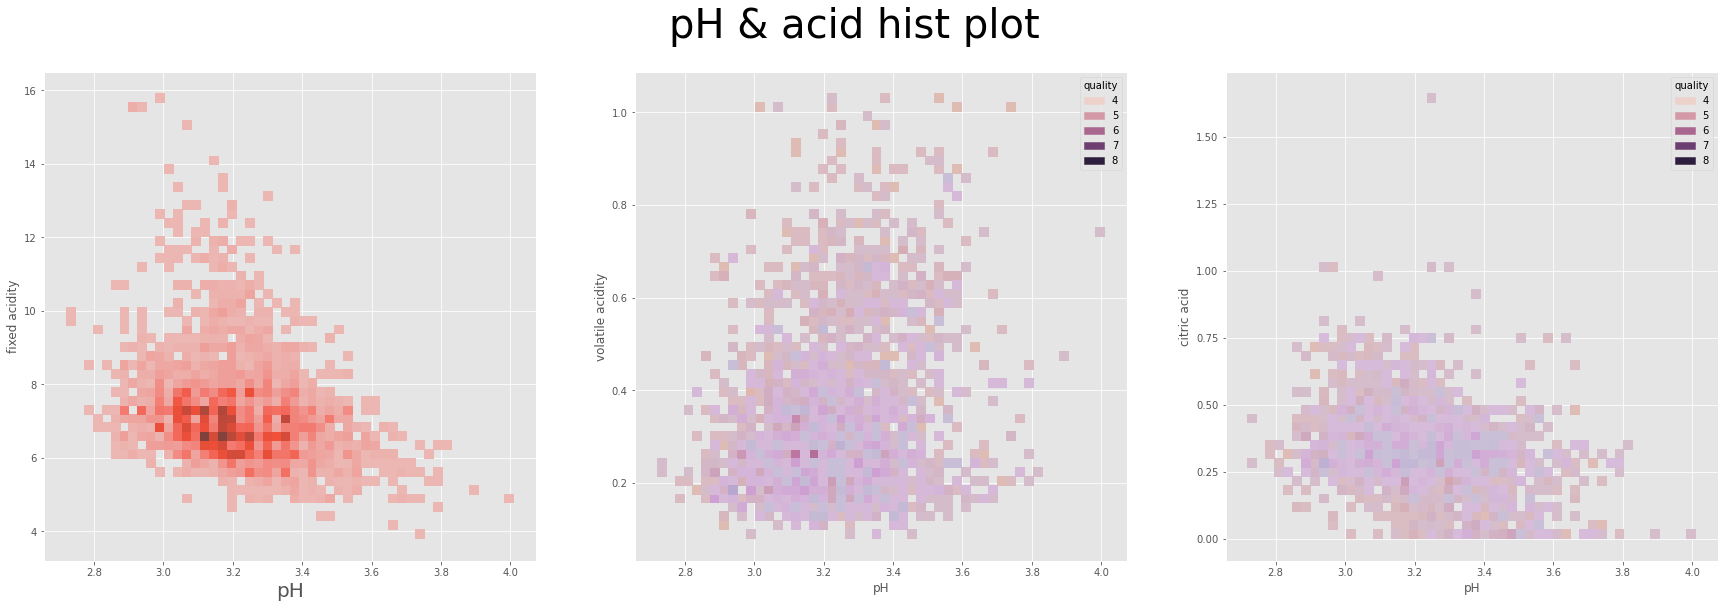

In [33]:
sns.color_palette("Set2")
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (30, 9))


scatter_fix = sns.histplot(data=train, x='pH', y='fixed acidity', bins=50, ax= ax1)
scatter_volatile =  sns.histplot(data=train, x='pH', y='volatile acidity', bins=50, ax= ax2, hue='quality')
scatter_citric = sns.histplot(data=train, x='pH', y='citric acid', bins=50, ax=ax3, hue='quality')
scatter_fix.set_xlabel('pH', fontsize=20)

fig.suptitle('pH & acid hist plot', fontsize = 40)

plt.show()

#별다른 상관 관계 없음

상관관계 확인: heatmap

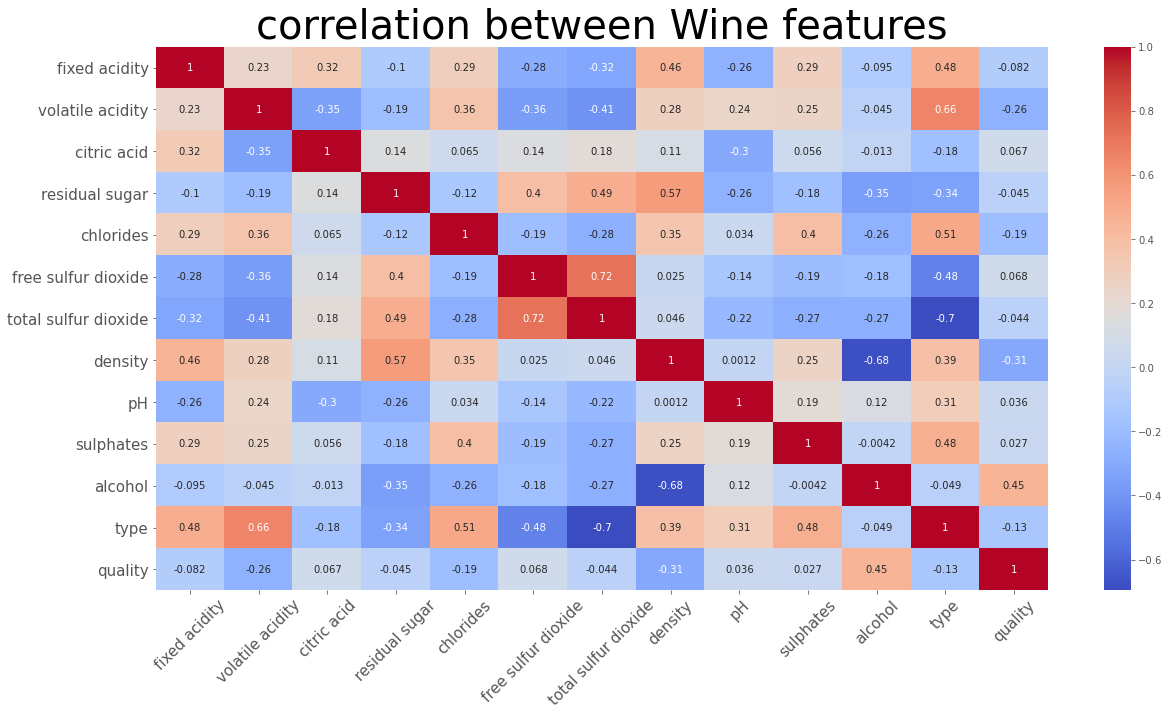

In [21]:
plt.figure(figsize=(20,10))

heat_table = train.drop(['id'], axis=1).corr()
heatmap_ax = sns.heatmap(heat_table, annot=True, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between Wine features', fontsize=40)
plt.show()

#total sulfur dioxide, free sulfur dioxide: 0.72
#type, volatile acidiy: 0.66
#total sulfur dioxide, type: -0,7
#density, alchol: -0.68

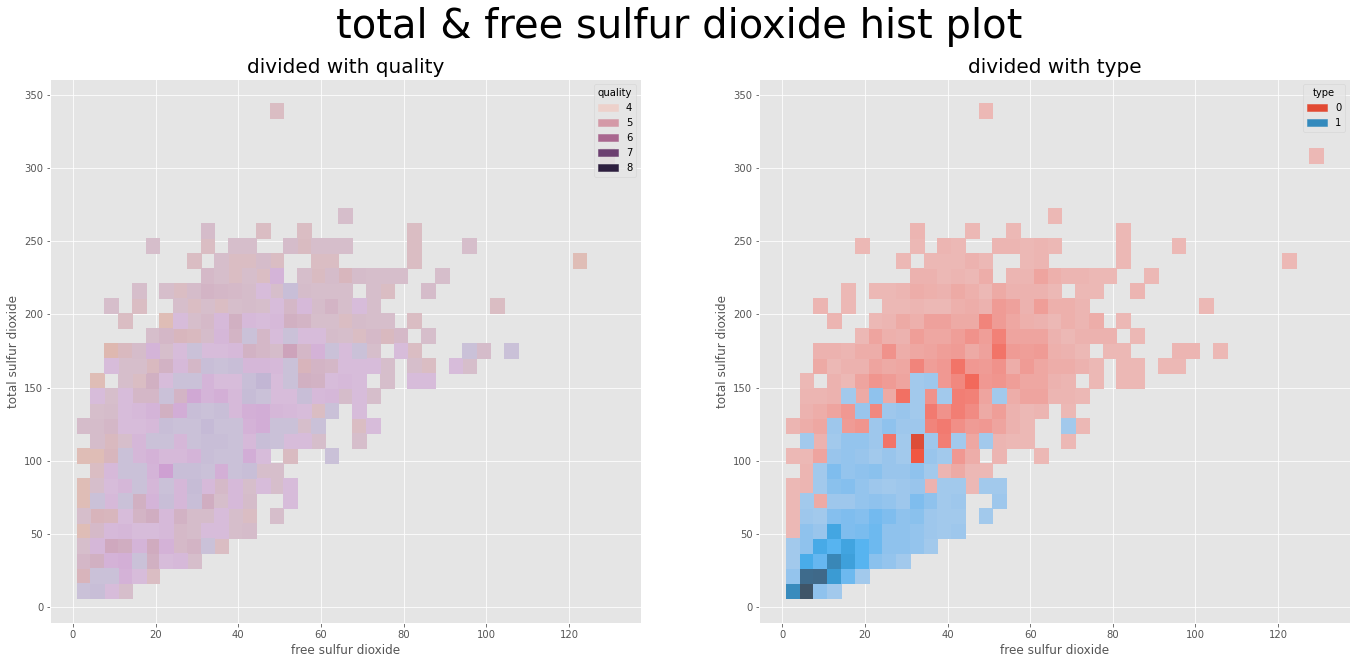

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(2.33 * 10, 1 * 10))

for i, ax in enumerate(axes):
    if i == 0:
        sns.histplot(x= 'free sulfur dioxide', y= 'total sulfur dioxide', ax= ax, hue= 'quality',data= train)
    else:
        sns.histplot(x= 'free sulfur dioxide', y= 'total sulfur dioxide', ax= ax, hue= 'type',data= train)
        
axes[0].set_title('divided with quality', fontsize=20)
axes[1].set_title('divided with type', fontsize=20)
fig.suptitle('total & free sulfur dioxide hist plot', fontsize= 40)
plt.show()

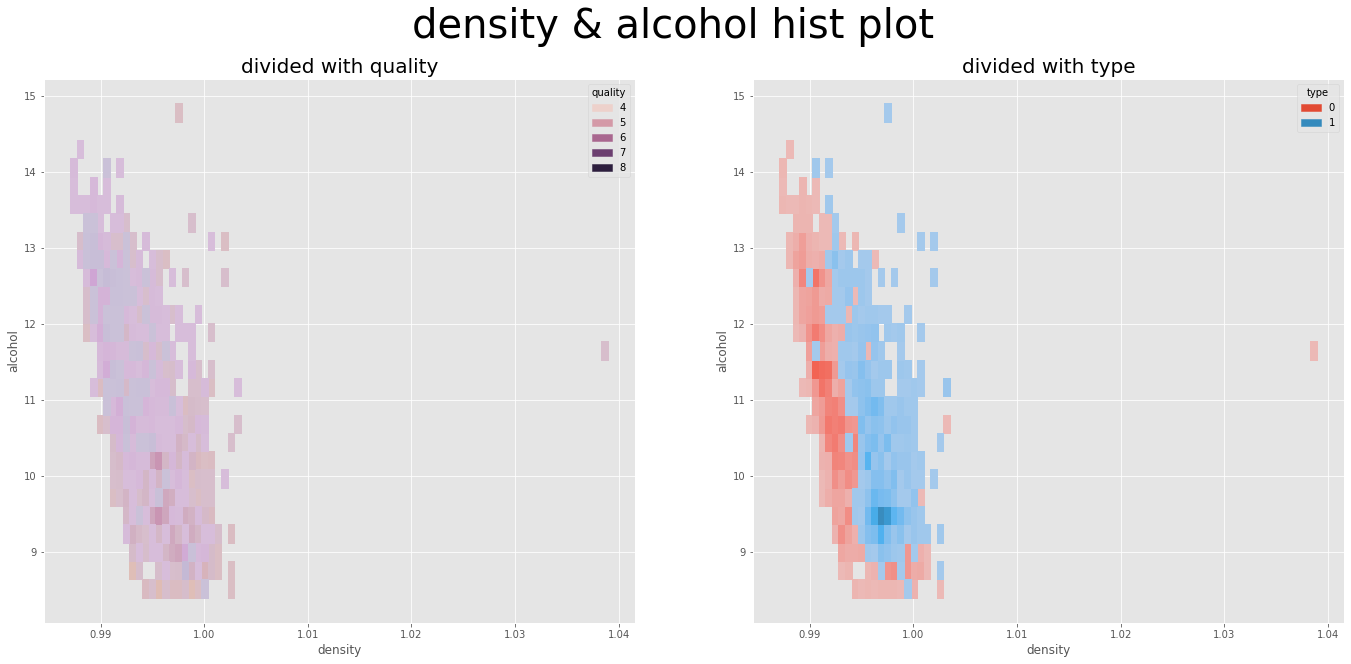

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(2.33 * 10, 1 * 10))

for i, ax in enumerate(axes):
    if i == 0:
        sns.histplot(x= 'density', y= 'alcohol', ax= ax, hue= 'quality',data= train)
    else:
        sns.histplot(x= 'density', y= 'alcohol', ax= ax, hue= 'type',data= train)
        
axes[0].set_title('divided with quality', fontsize=20)
axes[1].set_title('divided with type', fontsize=20)
fig.suptitle('density & alcohol hist plot', fontsize= 40)
plt.show()

#전반적으로 우상향하는 추세
#하지만 품질보다 와인 종류에 더 연관성이 높아 보임

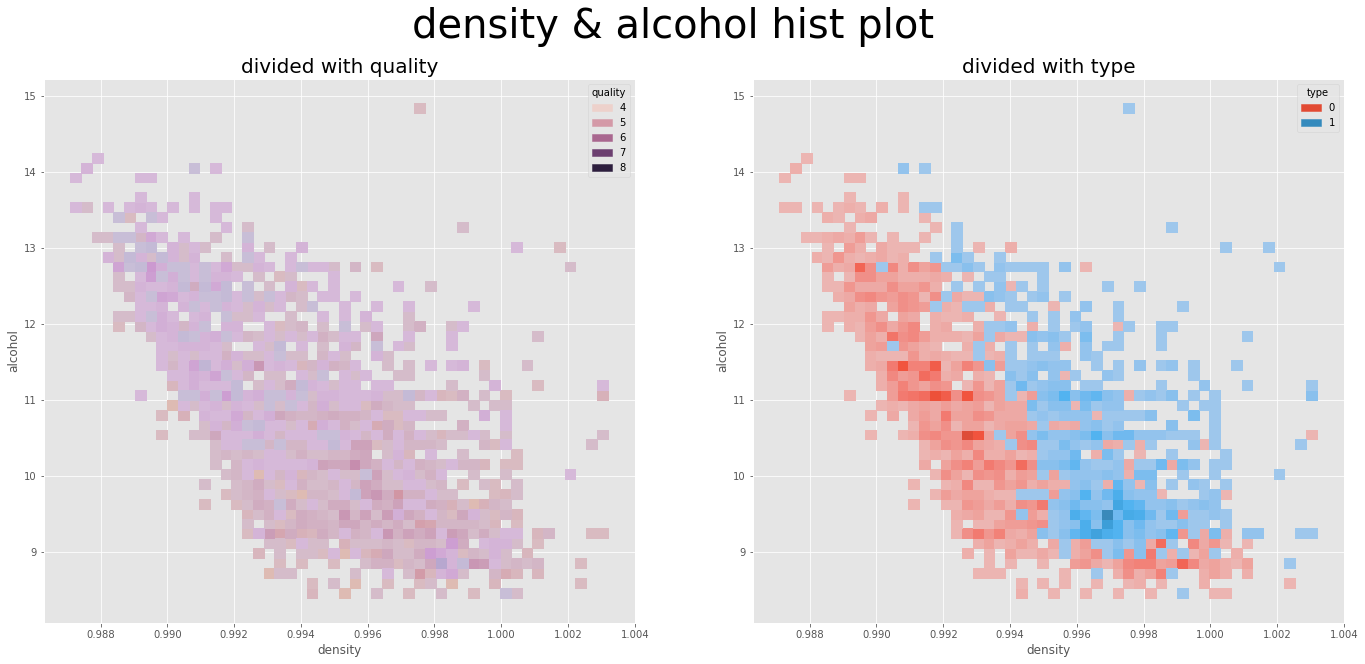

In [45]:
#이상치 제거하고 다시 hist plot 그려보자

fig, axes = plt.subplots(1, 2, figsize=(2.33 * 10, 1 * 10))

for i, ax in enumerate(axes):
    if i == 0:
        sns.histplot(x= 'density', y= 'alcohol', ax= ax, bins=50, hue= 'quality',data= train.drop(train[train['density'] == max(train['density'])].index))
    else:
        sns.histplot(x= 'density', y= 'alcohol', ax= ax, bins=50, hue= 'type',data= train.drop(train[train['density'] == max(train['density'])].index))
        
axes[0].set_title('divided with quality', fontsize=20)
axes[1].set_title('divided with type', fontsize=20)
fig.suptitle('density & alcohol hist plot', fontsize= 40)
plt.show()

#전반적으로 우하향하는 추세
#하지만 와인종류와 더욱 연관성이 높아보임 .. ?

## 데이터 전처리

01) Logarithmic Scaling

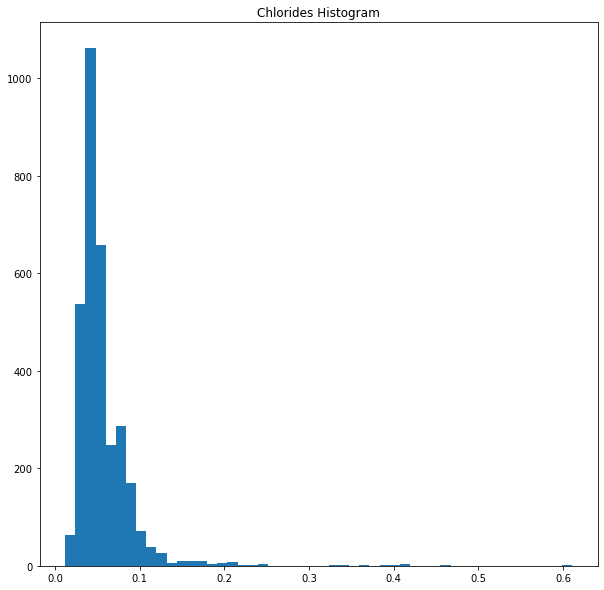

In [2]:
#가장 이상치가 많았던 chlorieds 살펴보자
plt.figure(figsize=(10,10))
plt.hist(train['chlorides'], bins=50)
plt.title('Chlorides Histogram')
plt.show()

#왼쪽으로 매우 치우친 모양 -> logarithm scaling을 사용하면 효과적임

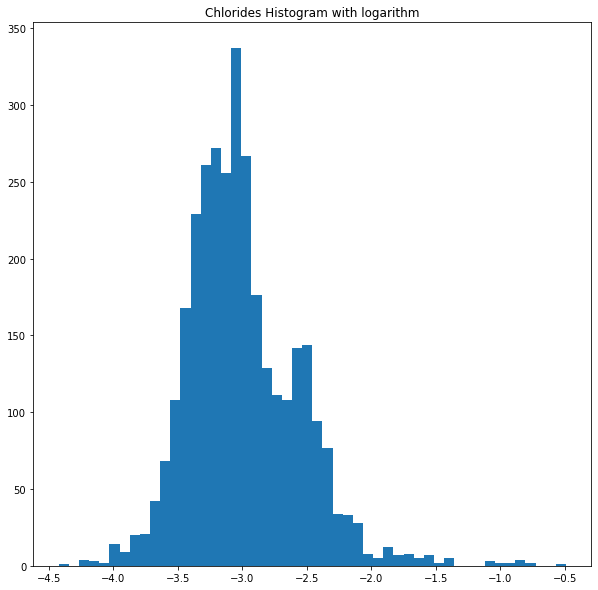

In [3]:
log_chlorides = np.log(train['chlorides'])

plt.figure(figsize=(10,10))
plt.hist(log_chlorides, bins=50)
plt.title('Chlorides Histogram with logarithm')
plt.show()

#비교적 정규분포에 매우 가까워짐

In [4]:
#다른 비대칭 데이터에게도 적용

#logarith scaling 함수 선언
def logarithm_scaler(df):
    epsilon = 1e-10
    for i in df.columns:
        if df[i].min() == 0:
            df[i] = np.sqrt(df[i])
        else:
            df[i] = np.log(df[i])
    return df

transform_data = train.drop(columns=['id','type', 'total sulfur dioxide', 'quality']) 

train[transform_data.columns] = logarithm_scaler(transform_data)
train

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,1,2.079442,-1.714798,0.608276,0.262364,-3.218876,2.708050,96.0,-0.008839,1.118415,-0.494296,2.493205,white,6
1,2,2.014903,-0.967584,0.538516,1.589235,-3.863233,3.637586,113.0,-0.009788,1.124930,-0.733969,2.564949,white,7
2,3,1.808289,-1.309333,0.574456,0.788457,-3.863233,3.258097,117.0,-0.011465,1.137833,-1.203973,2.525729,white,6
3,4,1.856298,-1.139434,0.707107,2.370244,-3.057608,4.043051,206.0,-0.003205,1.124930,-0.510826,2.240710,white,5
4,5,2.128232,-0.994252,0.655744,0.832909,-2.764621,2.484907,19.0,-0.004510,1.153732,-0.210721,2.415914,red,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3226,3227,1.856298,-1.832581,0.556776,1.667707,-3.146555,3.737670,157.0,-0.005465,1.208960,-0.755023,2.351375,white,5
3227,3228,1.856298,-1.714798,0.529150,2.836150,-3.057608,3.970292,139.0,-0.002764,1.178655,-1.049822,2.351375,white,6
3228,3229,1.791759,-1.272966,0.500000,0.587787,-3.170086,2.079442,108.0,-0.007125,1.124930,-0.597837,2.197225,white,5
3229,3230,2.041220,-1.272966,0.538516,1.931521,-3.194183,3.367296,163.0,-0.004812,1.235471,-0.510826,2.351375,white,6


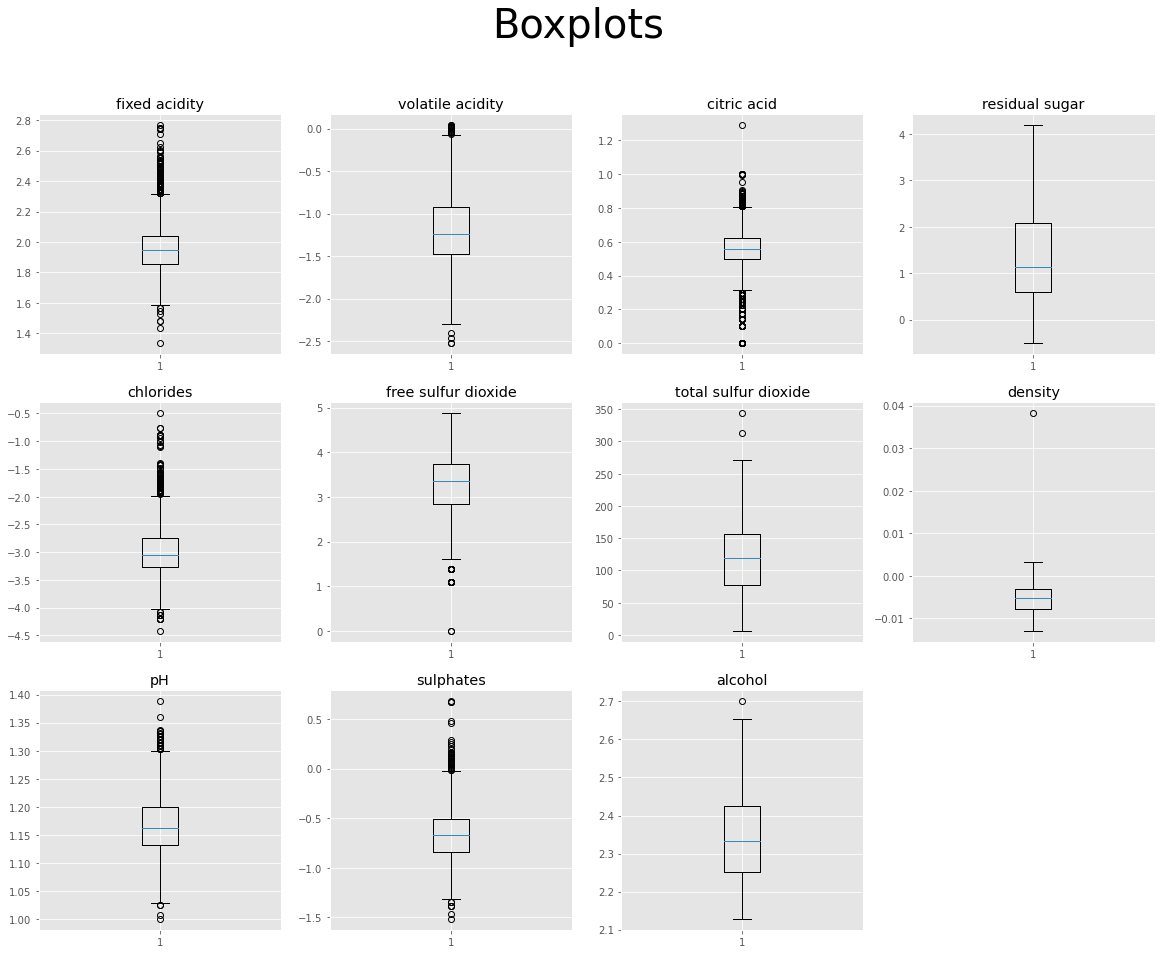

In [9]:
#다시 boxplot을 그려보자

plt.figure(figsize=(20,15))
plt.suptitle("Boxplots", fontsize=40)
cols = train.columns[1:-2]
for i in range(len(cols)):
    plt.subplot(3,4,i+1)
    plt.title(cols[i])
    plt.boxplot(train[cols[i]])
plt.show()

#아직도 outlier가 많이 존재하지만 이전에 비해 매우 적어진 모습

02) Standard Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

transform_data = train.drop(columns=['id','type', 'quality']) 

std_transform_data = sc.fit_transform(transform_data)

train[transform_data.columns] = std_transform_data
train

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,1,0.725564,-1.209520,0.420652,-1.220969,-0.521026,-0.742326,-0.363344,-1.137561,-0.957315,0.671074,1.332218,white,6
1,2,0.331005,0.508800,-0.040030,0.305077,-2.015390,0.601149,-0.058413,-1.447071,-0.827105,-0.263347,1.976322,white,7
2,3,-0.932141,-0.277099,0.197310,-0.615905,-2.015390,0.052666,0.013335,-1.994371,-0.569203,-2.095767,1.624205,white,6
3,4,-0.638634,0.113607,1.073311,1.203323,-0.147021,1.187176,1.609735,0.700270,-0.827105,0.606631,-0.934641,white,5
4,5,1.023845,0.447473,0.734119,-0.564780,0.532462,-1.064840,-1.744499,0.274552,-0.251436,1.776659,0.638308,red,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3226,3227,-0.638634,-1.480378,0.080556,0.395328,-0.353304,0.745802,0.730818,-0.036901,0.852429,-0.345428,0.058893,white,5
3227,3228,-0.638634,-1.209520,-0.101882,1.739166,-0.147021,1.082015,0.407951,0.844233,0.246712,-1.494774,0.058893,white,6
3228,3229,-1.033193,-0.193466,-0.294386,-0.846698,-0.407874,-1.650866,-0.148099,-0.578553,-0.827105,0.267397,-1.325043,white,5
3229,3230,0.491897,-0.193466,-0.040030,0.698744,-0.463760,0.210494,0.838440,0.176231,1.382310,0.606631,0.058893,white,6


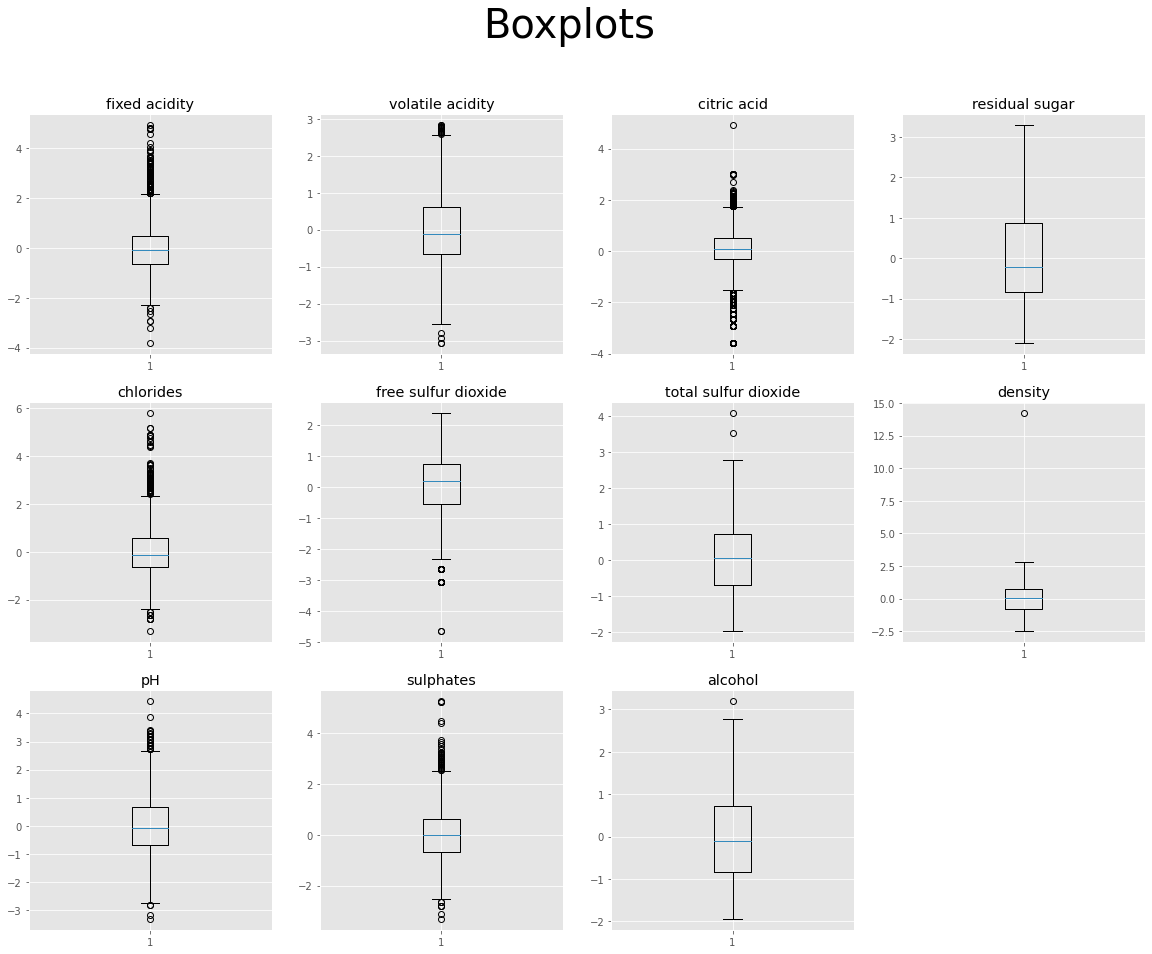

In [11]:
#다시 boxplot을 그려보자

plt.figure(figsize=(20,15))
plt.suptitle("Boxplots", fontsize=40)
cols = train.columns[1:-2]
for i in range(len(cols)):
    plt.subplot(3,4,i+1)
    plt.title(cols[i])
    plt.boxplot(train[cols[i]])
plt.show()

#음 .. 단위가 통일되었지만 아직도 outlier 많다

03) remove outliers

In [6]:
#일반적으로 표준편차가 2.5 이상 차이나면 이상치라고 판단
#3 이상이면 이상치로 판단하고 제거

before_remove = len(train)
train[transform_data.columns] = np.where(abs(std_transform_data) > 3, np.nan, std_transform_data)
train = train.dropna()
print('Removed : -', before_remove - len(train))

Removed : - 207


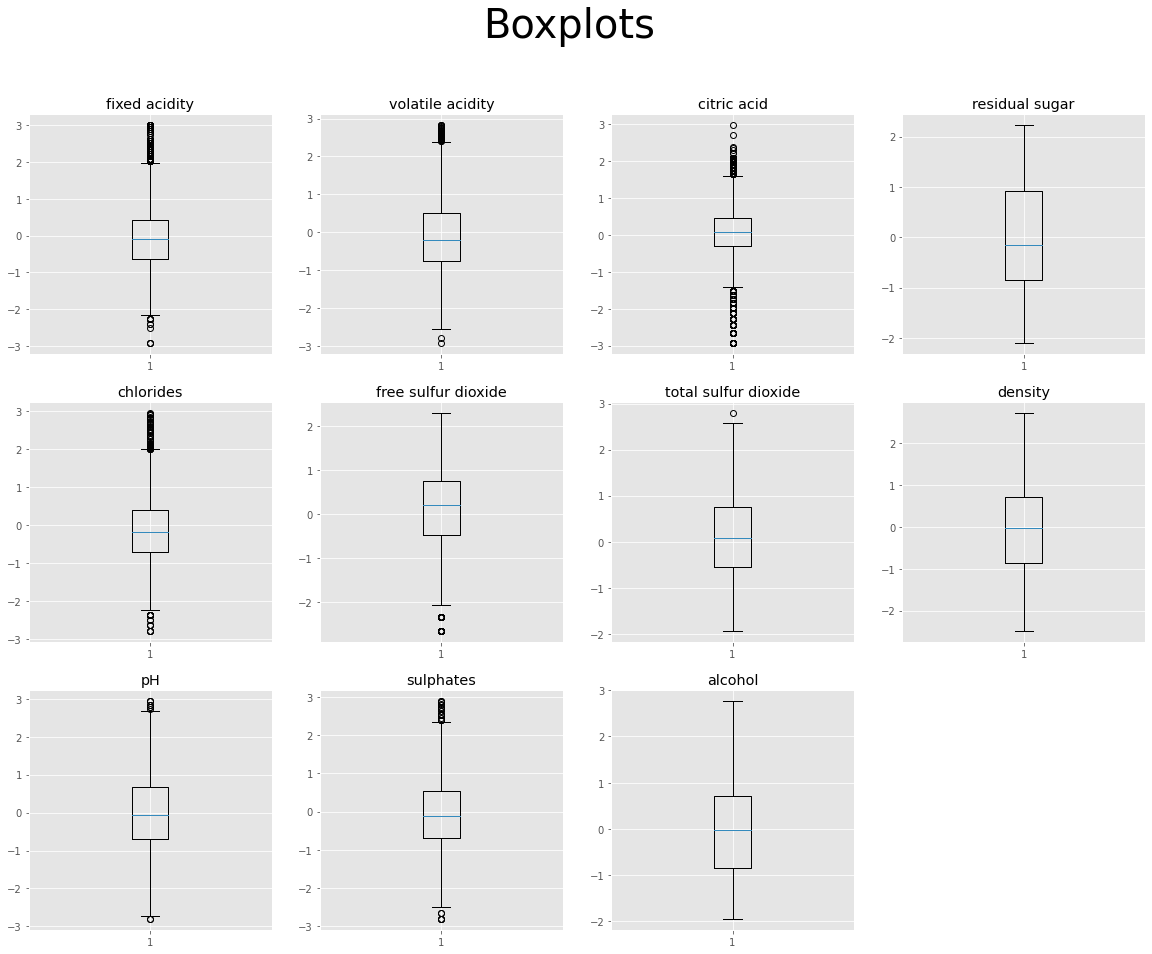

In [123]:
#다시 boxplot

plt.figure(figsize=(20,15))
plt.suptitle("Boxplots", fontsize=40)
cols = train.columns[1:-2]
for i in range(len(cols)):
    plt.subplot(3,4,i+1)
    plt.title(cols[i])
    plt.boxplot(train[cols[i]])
plt.show()

04) Text Encoding

In [7]:
#type: 문자열 형태 ["white", "red"] -> 숫자 형태
#white: 0, red: 1

type_to_num = {"white": 0, "red": 1}
train['type'] = train['type'].replace(type_to_num)

# quality: 4, 5, 6, 7 -> 0, 1, 2, 3
quality_to_num = {4:0, 5:1, 6:2, 7:3, 8:4}
train['quality'] = train['quality'].replace(quality_to_num)
train

<ipython-input-7-ed50181837c0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['type'] = train['type'].replace(type_to_num)
<ipython-input-7-ed50181837c0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['quality'] = train['quality'].replace(quality_to_num)


,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,1,0.725564,-1.209520,0.420652,-1.220969,-0.521026,-0.742326,-0.363344,-1.137561,-0.957315,0.671074,1.332218,0,2
1,2,0.331005,0.508800,-0.040030,0.305077,-2.015390,0.601149,-0.058413,-1.447071,-0.827105,-0.263347,1.976322,0,3
2,3,-0.932141,-0.277099,0.197310,-0.615905,-2.015390,0.052666,0.013335,-1.994371,-0.569203,-2.095767,1.624205,0,2
3,4,-0.638634,0.113607,1.073311,1.203323,-0.147021,1.187176,1.609735,0.700270,-0.827105,0.606631,-0.934641,0,1
4,5,1.023845,0.447473,0.734119,-0.564780,0.532462,-1.064840,-1.744499,0.274552,-0.251436,1.776659,0.638308,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3226,3227,-0.638634,-1.480378,0.080556,0.395328,-0.353304,0.745802,0.730818,-0.036901,0.852429,-0.345428,0.058893,0,1
3227,3228,-0.638634,-1.209520,-0.101882,1.739166,-0.147021,1.082015,0.407951,0.844233,0.246712,-1.494774,0.058893,0,2
3228,3229,-1.033193,-0.193466,-0.294386,-0.846698,-0.407874,-1.650866,-0.148099,-0.578553,-0.827105,0.267397,-1.325043,0,1
3229,3230,0.491897,-0.193466,-0.040030,0.698744,-0.463760,0.210494,0.838440,0.176231,1.382310,0.606631,0.058893,0,2


05) Data Augmentation

In [8]:
#class 4.8 데이터 2배로 늘려주기

before_aug = len(train)
train = train.append(train[train['quality'].isin([4,8])])
print('Augmented : +', len(train) - before_aug)

Augmented : + 96


## 변수 및 모델 정의

In [9]:
train

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,1,0.725564,-1.209520,0.420652,-1.220969,-0.521026,-0.742326,-0.363344,-1.137561,-0.957315,0.671074,1.332218,0,2
1,2,0.331005,0.508800,-0.040030,0.305077,-2.015390,0.601149,-0.058413,-1.447071,-0.827105,-0.263347,1.976322,0,3
2,3,-0.932141,-0.277099,0.197310,-0.615905,-2.015390,0.052666,0.013335,-1.994371,-0.569203,-2.095767,1.624205,0,2
3,4,-0.638634,0.113607,1.073311,1.203323,-0.147021,1.187176,1.609735,0.700270,-0.827105,0.606631,-0.934641,0,1
4,5,1.023845,0.447473,0.734119,-0.564780,0.532462,-1.064840,-1.744499,0.274552,-0.251436,1.776659,0.638308,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3044,3045,-1.677319,1.273902,-0.954768,-0.380369,-0.765374,0.440393,0.210643,-2.007571,-0.063173,0.122982,2.113390,0,4
3122,3123,-1.565141,1.093446,-2.452482,-0.846698,-0.299987,0.159775,-0.524777,-1.269231,1.727918,1.824497,2.641649,1,4
3143,3144,-0.932141,-0.193466,-0.164850,0.257149,-1.188206,1.161594,0.425888,-1.394368,-0.314586,-0.783950,1.624205,0,4
3155,3156,0.411980,-0.967230,0.020766,1.528801,0.259305,1.082015,1.726326,1.419451,-0.441489,-0.429275,-1.425354,0,4


In [10]:
X = train.drop(['id','quality'], axis=1)
y = train['quality']

In [11]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [26]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, pred_lr))

Accuracy: 0.5241057542768274


In [126]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

## 가장 기초적인 성적 평가 지표들
print("Accuracy:", metrics.accuracy_score(y_test, pred_rfc))

Accuracy: 0.6889580093312597


In [27]:
#svc
svc = SVC()
svc.fit(X_train,y_train)
pred_svc = svc.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, pred_svc))

Accuracy: 0.5863141524105754


In [16]:
#GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=300, random_state=30)
gb.fit(X_train, y_train)
pred_gb = gb.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, pred_gb))

Accuracy: 0.5913461538461539


In [31]:
#knn
knn = KNeighborsClassifier(6)
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, pred_knn))

Accuracy: 0.5474339035769828


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

cross_val_score(clf, X_train, y_train, cv=10)

In [ ]:
#rfc가 정확도가 제일 높다

In [32]:
from collections import Counter

pred_cnt = Counter(pred_rfc)
true_cnt = Counter(y_test)

for key in sorted(true_cnt.keys()):
    print(f"{key} 값 예측 개수: {pred_cnt[key]}개, 실제 값 개수: {true_cnt[key]}개")

4 값 예측 개수: 32개, 실제 값 개수: 38개
5 값 예측 개수: 199개, 실제 값 개수: 200개
6 값 예측 개수: 307개, 실제 값 개수: 265개
7 값 예측 개수: 65개, 실제 값 개수: 102개
8 값 예측 개수: 40개, 실제 값 개수: 38개


Tuning

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))

In [ ]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svc__C': param_range, 
               'svc__kernel': ['linear']},
              {'svc__C': param_range, 
               'svc__gamma': param_range, 
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  refit=True,
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

In [29]:
xbg =XGBClassifier()
param_grid={'booster' :['gbtree'],
                 'max_depth':[5,6,8],
                 'min_child_weight':[1,3,5],
                 'gamma':[0,1,2,3],
                 'nthread':[4],
                 'colsample_bytree':[0.5,0.8],
                 'colsample_bylevel':[0.9],
                 'n_estimators':[50],
                 'objective':['binary:logistic'],
                 'random_state':[2]}

In [35]:
from sklearn.model_selection import KFold

cv=KFold(n_splits=6)

# 4번
gcv=GridSearchCV(xbg, param_grid=param_grid, cv=cv, scoring='f1', n_jobs=4)

# 5번
gcv.fit(X_train, y_train)
print('final params', gcv.best_params_)   # 최적의 파라미터 값 출력
print('best score', gcv.best_score_)      # 최고의 점수

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:58:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:58:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
final params {'booster': 'gbtree', 'colsample_bylevel': 0.9, 'colsample_bytree': 0.5, 'gamma': 0, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 50, 'nthread': 4, 'objective': 'binary:logistic', 'random_state': 2, 'silent': True}
best score nan


In [ ]:
GridSearchCV(xbg,       # estimator
            param_grid=  {'booster': 'gbtree', 'colsample_bylevel': 0.9, 'colsample_bytree': 0.5, 'gamma': 0, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 50, 'nthread': 4, 'objective': 'binary:logistic', 'random_state': 2, 'silent': True},   # 찾고자하는 파라미터. dict형식
            cv= 2 or KFold(2),
            scoring=None,  #  Classification일때  'accuracy','f1'
                           #  Regression 일때 'neg_mean_squared_error','r2'...
                           # 자세한건 아래 링크를 통해 확인 가능합니다.
            n_jobs= 4,     # 병렬 처리갯수? -1은 전부)
            refit=True     # default가 True. 
                           # 좋은 estimator로 수정되어짐.
            )   


GCV=GridSErchCV( )         # 옵션.
GCV.fit()                 # train_X, train_Y 
GCV.best_params_           # 좋은 파라미터를 보여줌.
GCV.best_score_            # 0.88 좋은 estimator로
                           # 교차검증된점수를 보여줌.

# 예측방법.1
model=GCV.best_estimator_  # 최적의 파라미터로 모델 생성
model.predict()            # refit=True이기때문에 좋은 estimator로
                           # 수정되어졌으므로 바로 예측에 적용할 수 있다.
# 예측방법2
GCV.predict( )             # test_X,  학습후 최적의 파라미터로 예측한다

## 예측 값 생성 및 제출

In [127]:
X = train.drop(['id', 'quality', 'citric acid'], axis=1)
y = train['quality']

rfc.fit(X, y)

RandomForestClassifier(n_estimators=200)

In [128]:
test = pd.read_csv('data/test.csv')

#전처리
# 로그 변환 과정
transform_data = test.drop(columns=['id','type']) 
test[transform_data.columns] = logarithm_scaler(transform_data)

# Scaling 과정
transform_data = test.drop(columns=['id','type']) 
scaler = StandardScaler()
std_transform_data = scaler.fit_transform(transform_data)
test[transform_data.columns] = std_transform_data

# Text labeling 과정
type_to_num = {"white": 0, "red": 1}
test['type'] = test['type'].replace(type_to_num)

quality_to_num = {4:0, 5:1, 6:2, 7:3, 8:4}
train['quality'] = train['quality'].replace(quality_to_num)

In [132]:
prediction = rfc.predict(test.drop(['id' ,'citric acid'], axis=1))
prediction

array([2, 1, 2, ..., 1, 3, 3], dtype=int64)

In [133]:
submission['quality'] = submission['quality'].replace({v: k for k, v in quality_to_num.items()})

In [134]:
submission

,id,quality
0,1,6
1,2,5
2,3,6
3,4,6
4,5,6
...,...,...
3226,3227,5
3227,3228,6
3228,3229,5
3229,3230,7


In [114]:
submission = pd.read_csv('data/sample_submission.csv')
submission['quality'] = prediction
submission

,id,quality
0,1,2
1,2,1
2,3,2
3,4,2
4,5,2
...,...,...
3226,3227,1
3227,3228,2
3228,3229,1
3229,3230,3


In [122]:
submission

,id,quality
0,1,6
1,2,5
2,3,6
3,4,6
4,5,6
...,...,...
3226,3227,5
3227,3228,6
3228,3229,5
3229,3230,7


In [135]:
submission.to_csv('submission.csv', index= False)